In [1]:
#import libs
import sys,os
import numpy as np

os.chdir(r'G:\My Drive\Documents\PhD\Modelling\_RiceBall')
from ricepaper.material import NodeSet
from ricepaper import RicePaper
from ricepaper.utils import *

import matplotlib.pyplot as plt

In [2]:
#define a material
mat = NodeSet("volcano",[30,25,20], #radii
                         2500, #densities (applied to all radii)
                         6.96e9, #young's modulus (applied to all radii)
                         0.2) #poisson ratio (applied to all radii)
mat.setFriction(0.3, #friction coefficient
                2.5e6) #2.5 MPa cohesion
mat.setBonding( 5e9, #normal stiffness (Pa)
                5e9, #shear stiffness (Pa)
                5e6, #tensile strength (Pa)
                10e6) #shear strength (Pa)

In [3]:
#create ricepaper instance and apply materials
R = RicePaper("Material_Test")
mat._bindPropsToModel(R)

In [4]:
#print output file to check it looks reasonable
for l in R.lines:
    print(l,end = "")


*****************************
** define material 'volcano' 
*****************************

** particle type 1
RAD 30.00 1
DENS 2500 1
HERTZ 2.900000E+09 0.200000 1

** particle type 2
RAD 25.00 2
DENS 2500 2
HERTZ 2.900000E+09 0.200000 2

** particle type 3
RAD 20.00 3
DENS 2500 3
HERTZ 2.900000E+09 0.200000 3

** particle interactions
FRIC 0.300000 1 1
SH 5.000000E+09 1 1
NO 5.000000E+09 1 1
COH 2500000.000000 1 1
BONd 5.00E+09 5.00E+09 5.00E+06 1.00E+07 1 1

FRIC 0.300000 2 1
SH 5.000000E+09 2 1
NO 5.000000E+09 2 1
COH 2500000.000000 2 1
BONd 5.00E+09 5.00E+09 5.00E+06 1.00E+07 2 1

FRIC 0.300000 2 2
SH 5.000000E+09 2 2
NO 5.000000E+09 2 2
COH 2500000.000000 2 2
BONd 5.00E+09 5.00E+09 5.00E+06 1.00E+07 2 2

FRIC 0.300000 3 1
SH 5.000000E+09 3 1
NO 5.000000E+09 3 1
COH 2500000.000000 3 1
BONd 5.00E+09 5.00E+09 5.00E+06 1.00E+07 3 1

FRIC 0.300000 3 2
SH 5.000000E+09 3 2
NO 5.000000E+09 3 2
COH 2500000.000000 3 2
BONd 5.00E+09 5.00E+09 5.00E+06 1.00E+07 3 2

FRIC 0.300000 3 3
SH 5.000

In [5]:
#generate a packing
R = mat.gravityDeposit(1000,1000,walltype=3,suppress=True)

Generating 372 particles (excluding walls)
Average kinetic energy = 1.768464E+09
Average kinetic energy = 5.991076E+08
Average kinetic energy = 3.938937E+05
Average kinetic energy = 1.254790E-03
Model equilibrated


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


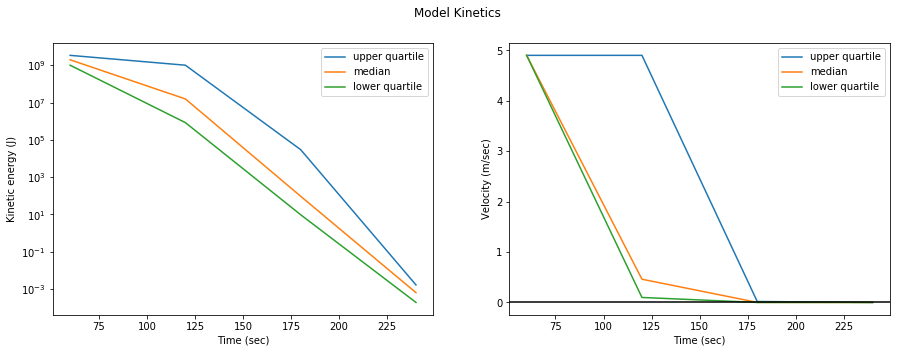

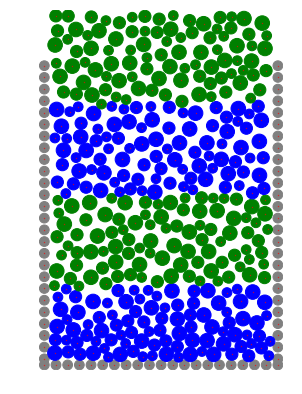

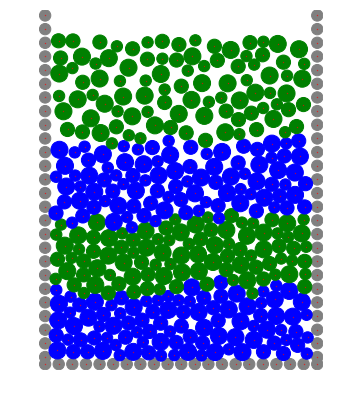

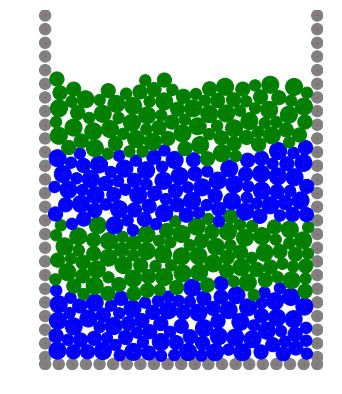

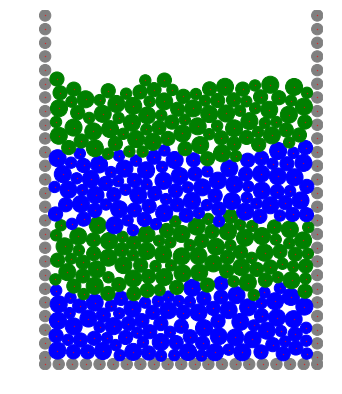

In [6]:
#get steps
steps = list(range(1,R.file+1))

#plot equilibration curves
fig,ax = R.plotKinetics(steps)

#plot model
M = R.loadSteps(steps)
for m in M:
    m.quickPlot()

In [7]:
"""
Do an unconfined compression test to measure the elastic properties and compressive strength of this material

**Arguments**:
    -lower = the height of the base of the domain to compress
    -upper = the height of the top of the domain to compress
    -velocity = the y-velocity of the upper plate (lower plate velocity = 0). 
**Keywords**:
    -tStep = the timestep to use for the simulation. Default is 0.005 seconds. 
    -stepSize = the time (in seconds) to run the model for before writing output. Default is 10.
    -nSteps = the number of steps to run the model for. Default is 10. 
    -verbose = True if output is printed to console. Default is true. 
    -suppress = If True, the model is not actually executed (i.e. it is assumed that output has been
               generated on a previous run. Useful for debugging quickly. Default is False. 
**Returns**:
    -stress = the average pressure on the upper domain of the shear box at each step.
    -axial_strain = the bulk axial strain at each step.
    -lateral_strain = the bulk lateral strain at each step.
    -M = list of RiceBall objects containing particle configurations at each step in the test.
"""
def compressionTest(self,lower,upper,velocity,**kwds):
    print("todo")

In [8]:
#do a shear test
stress0MPa,strain0MPa,M = mat.shearTest(100,900,0.5,normalStress=0)
stress1MPa, strain1MPa, M2 = mat.shearTest(100,900,0.5,normalStress=25e6)

RiceBall execution finished in 1.32 minutes.
RiceBall execution finished in 1.17 minutes.


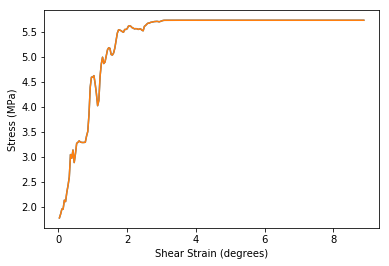

In [9]:
#plot stress and strain
plt.plot(strain0MPa,stress0MPa[:,1]/1e6)
plt.plot(strain1MPa,stress1MPa[:,1]/1e6)
plt.xlabel("Shear Strain (degrees)")
plt.ylabel("Stress (MPa)")
plt.show()

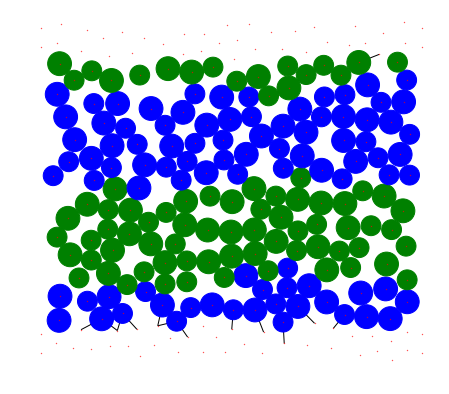

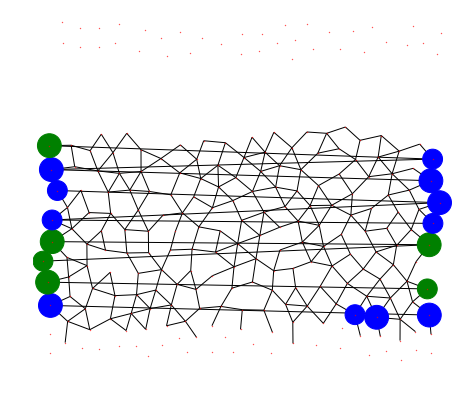

In [13]:
#plot the end of the test
M2[0].plotUnbalanced(0.1)
M2[-1].plotUnbalanced(0.1)

In [15]:
np.array([1,2,3]).shape == (3,)

True